<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch02/02_karaage_ai_book_image_classification_tf2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像分類

画像分類を実践するノートブックです。

## 教師データのダウンロード

ジャンケンの手の形の教師データをGitHubからダウンロード（Clone）します。

2,3行目はダウンロードしたデータから、使用するデータ以外の不要なファイルを削除しています。

In [1]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 18.60 MiB/s, done.
Resolving deltas: 100% (3/3), done.


データの中身の確認

In [2]:
!ls datasets

choki  gu  pa


In [3]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


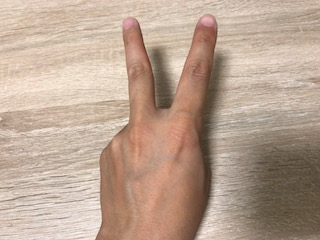

In [4]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

## 教師データを訓練データ（Train Data）とテストデータ（Validation Data）に分割

ディレクトリの構造を可視化するための`tree`というソフトをインストールします。

In [5]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (50.8 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure:

In [6]:
!tree -d datasets

datasets
├── choki
├── gu
└── pa

3 directories


教師データのディレクトリと、ターゲットとなるディレクトリ（この下に訓練データのディレクトリと検証データのディレクトリが生成される）を指定します。

In [7]:
dataset_original_dir = 'datasets'
dataset_root_dir = 'target_datasets'

教師データを訓練データのディレクトリ(train)と検証データのディレクトリ（val）に分割するスクリプトをダウンロードします。

スクリプトのプログラムに関しては、本ノートブックの主題では無いので割愛します。興味ある方は以下のアドレスで、ソフトの中身を確認して下さい。

https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

In [8]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2022-12-13 12:52:17--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2022-12-13 12:52:17 (40.9 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [9]:
import split_train_val
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67)

datasets/choki copy is done
datasets/gu copy is done
datasets/pa copy is done
processing is done


In [10]:
!tree -d target_datasets

target_datasets
├── train
│   ├── choki
│   ├── gu
│   └── pa
└── val
    ├── choki
    ├── gu
    └── pa

8 directories


In [11]:
!ls target_datasets/train/choki

choki_01.jpg  IMG_0781.JPG  IMG_0793.JPG  IMG_0808.JPG	IMG_0872.JPG
IMG_0770.JPG  IMG_0782.JPG  IMG_0794.JPG  IMG_0809.JPG	IMG_0874.JPG
IMG_0771.JPG  IMG_0784.JPG  IMG_0799.JPG  IMG_0811.JPG	IMG_0875.JPG
IMG_0772.JPG  IMG_0785.JPG  IMG_0800.JPG  IMG_0812.JPG	IMG_0876.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0814.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0777.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0883.JPG
IMG_0778.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0780.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0871.JPG


In [12]:
!ls target_datasets/val/choki

IMG_0775.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0818.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0795.JPG  IMG_0807.JPG  IMG_0873.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0877.JPG
IMG_0783.JPG  IMG_0797.JPG  IMG_0813.JPG  IMG_0878.JPG
IMG_0786.JPG  IMG_0798.JPG  IMG_0815.JPG  IMG_0879.JPG


In [13]:
train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

## ラベルファイルの作成

学習するファイルのラベルを作成します

必要なライブラリをインポートします

In [14]:
import sys
import os
import shutil

データを保存する場所を指定します

In [15]:
backup_dir = './model'

ラベルデータを作成します（最後に表示される class numberが画像の種類の数です）

In [16]:
labels = [d for d in os.listdir(dataset_original_dir) \
    if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
  for label in labels:
    f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

class number=3


ラベルを確認します。ラベル名（choki, gu, pa）が並んでいればOKです

In [17]:
!cat ./model/labels.txt

choki
gu
pa


## 学習の事前準備

### ライブラリのインポート

必要なライブラリをインポートします

このNotebookはTensorFlow、2.x系で動作するので、TensorFlow 2.x系を選択してインポートします。

In [18]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


続いて、他に必要なライブラリをインポートします。

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

先ほど作成したラベルファイルから、ラベル情報を読み込みます

In [20]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)

NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


### 学習のハイパーパラメータの設定

学習のハイパーパラメータの設定をします

In [21]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 8

### データセットの前処理

データセットの前処理（変換）をします

In [22]:
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


### 前処理の確認

　イテレータを使うと、まとまったデータを順々に処理するのに便利なので、大量のデータを処理するディープラーニングではよく使われます。イテレータに関してより詳しく知りたい方は、Pythonの入門書やWebでの情報を調べてみて下さい。

ここでは、イテレータの中身を確認しておきます。イテレータの中身を確認するには next関数を使うのが簡単です。

In [23]:
(image_data,label_data) = train_data.next()
print(image_data)
print(label_data)

[[[[0.882353   0.8078432  0.7411765 ]
   [0.8745099  0.8000001  0.73333335]
   [0.83921576 0.76470596 0.69803923]
   ...
   [0.68235296 0.6        0.53333336]
   [0.69803923 0.60784316 0.5372549 ]
   [0.7725491  0.6745098  0.59607846]]

  [[0.8313726  0.7490196  0.6745098 ]
   [0.7725491  0.6901961  0.6156863 ]
   [0.7607844  0.6784314  0.6039216 ]
   ...
   [0.7843138  0.70980394 0.6431373 ]
   [0.7176471  0.63529414 0.56078434]
   [0.73333335 0.6509804  0.5764706 ]]

  [[0.8862746  0.8000001  0.7176471 ]
   [0.85098046 0.76470596 0.68235296]
   [0.8745099  0.78823537 0.7058824 ]
   ...
   [0.7372549  0.654902   0.5803922 ]
   [0.75294125 0.67058825 0.59607846]
   [0.654902   0.5803922  0.5137255 ]]

  ...

  [[0.8862746  0.8117648  0.7843138 ]
   [0.9058824  0.83921576 0.8078432 ]
   [0.8705883  0.80392164 0.7725491 ]
   ...
   [0.37254903 0.32156864 0.25882354]
   [0.43921572 0.38823533 0.3254902 ]
   [0.40784317 0.3529412  0.3019608 ]]

  [[0.91372555 0.8470589  0.81568635]
   [0.8

In [24]:
print(image_data.shape)
print(label_data.shape)

(8, 64, 64, 3)
(8, 3)


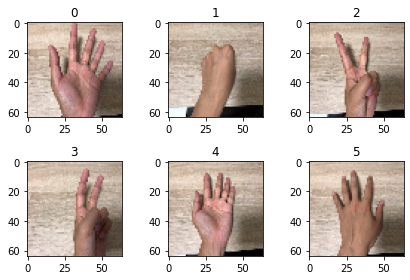

In [25]:
import matplotlib.pyplot as plt
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i])

## AIモデル作成

ニューラルネットワーク（CNN）モデルを作成します
これは、KerasのMNISTと呼ばれる文字認識に使われるニューラルネットワークモデルをベースにしています。

MNISTは、0,1の2値ですが、RGB画像に対応できるように改造しています。具体的には、最初の層の入力サイズを `input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)`とすることで対応しています。

https://keras.io/examples/mnist_cnn/

注：以下のコード、書籍では`lr`となっているところを最新のバージョンの推奨に合わせて`learning_rate`に変更しています。

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy', 
    metrics=['accuracy'])

モデルの概要を確認します

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 64)        0         
                                                      

AIモデルの学習を行います

In [29]:
%%time
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

Epoch 1/20
14/14 [==============================] - 9s 49ms/step - loss: 1.9891 - accuracy: 0.4054 - val_loss: 1.0485 - val_accuracy: 0.5714
Epoch 2/20
14/14 [==============================] - 0s 27ms/step - loss: 1.0438 - accuracy: 0.5676 - val_loss: 0.9180 - val_accuracy: 0.5536
Epoch 3/20
14/14 [==============================] - 0s 27ms/step - loss: 0.8038 - accuracy: 0.6757 - val_loss: 0.8035 - val_accuracy: 0.7321
Epoch 4/20
14/14 [==============================] - 0s 28ms/step - loss: 0.5846 - accuracy: 0.7838 - val_loss: 0.5056 - val_accuracy: 0.8750
Epoch 5/20
14/14 [==============================] - 0s 27ms/step - loss: 0.3247 - accuracy: 0.8829 - val_loss: 0.3335 - val_accuracy: 0.8929
Epoch 6/20
14/14 [==============================] - 0s 27ms/step - loss: 0.1735 - accuracy: 0.9550 - val_loss: 0.2509 - val_accuracy: 0.9286
Epoch 7/20
14/14 [==============================] - 0s 28ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.2281 - val_accuracy: 0.9464
Epoch 8/20
14

## 学習結果の可視化

lossを確認します。低いほど良い性能を示します。

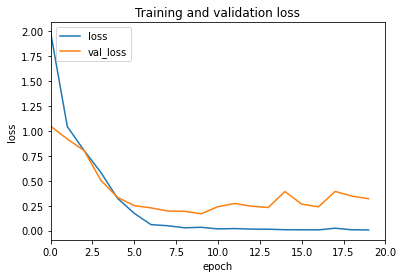

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

acc（精度）を確認します。accが訓練データでの精度で、この値が高いほど良い性能を意味します。
例えば0.5だと50%の正解率ということになります。

val_accというのが訓練に使っていないテストデータを使っての精度です。  
いわゆる、本当の精度と言われるものは、val_accの方となります。

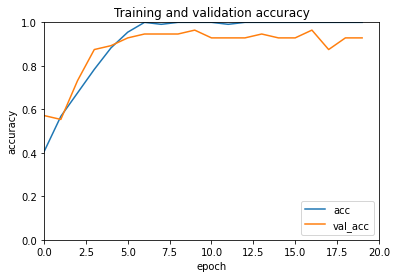

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

## 学習させたモデルを使った推定

学習させたモデルを使って、画像の推定を行います

1/1 [==============================] - 0s 80ms/step


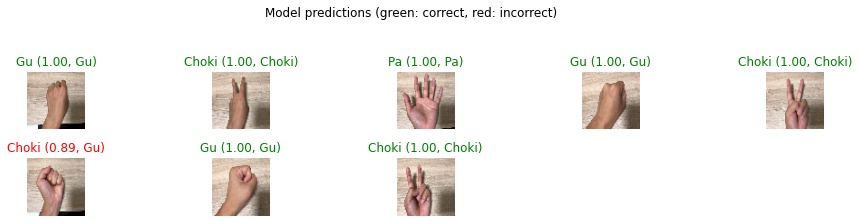

In [32]:
# Get the ordered list of class names:
import PIL.Image as Image
class_names = validation_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])

validation_data.reset()
validation_data.shuffle = True
validation_data.batch_size = BATCH_SIZE

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]
predicted_batch = model.predict(validation_image_batch)

# Returns the indices of the maximum values along a given axis
predicted_id = np.argmax(predicted_batch, axis=-1)

# Return the maximum values along a given axis
predicted_score = np.max(predicted_batch, axis=-1)

predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

# Display the classification results for the first 30 images
for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)

  # Convert the range from -1 to 1 to the range from 0 to 1
  plt.imshow(np.array(validation_image_batch[n]*255,np.int32))
  color = 'green' if predicted_id[n] == validation_id[n] else 'red'
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + ' ({:.2f}, {})'.format(
      predicted_score[n], validation_label[n]), color=color)
  plt.axis('off')

_ = plt.suptitle('Model predictions (green: correct, red: incorrect)')

56/56 [==============================] - 0s 7ms/step


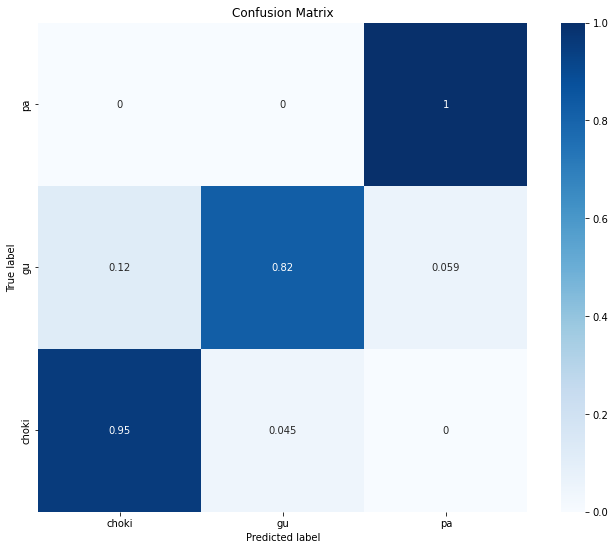

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_data.reset()
validation_data.shuffle =  False
validation_data.batch_size = 1

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

predicted = model.predict(validation_data, steps=validation_data.n)
predicted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = confusion_matrix(validation_data.classes, predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_data.class_indices,
            yticklabels=validation_data.class_indices)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()

## 学習モデルの保存と読み込み


Google Colaboratory上のファイルは、自動的に消えてしまうのでファイルを保存します

In [35]:
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
!ls model

labels.txt  my_model.h5


In [38]:
!cp './model/my_model.h5' '/content/drive/MyDrive'
!cp './model/labels.txt' '/content/drive/MyDrive'

あとは、Google Drive経由でファイルをダウンロードします。

## まとめ

ここまでで、学習から推論は完了です。

発展として、以下を実施してどうなるか確認してみましょう。

- ハイパーパラメータを変更して学習の変更度合いを確認
- 教師データをジャンケン以外のものにしてみる

## 参考リンク

以下は多くを参考にした情報です。

CNN構造
- http://aidiary.hatenablog.com/entry/20161127/1480240182


データN増し
- https://github.com/bohemian916/deeplearning_tool/blob/master/increase_picture.py

GradCam
- https://github.com/shinmura0/Python-study-group/blob/master/Text3.ipynb

GradCam Confusion Matrix
- https://colab.research.google.com/drive/1mirG8BSoB3k87mh-qyY3-8-ZXj0XB6h6

TensorFlow 2.x対応
- http://tensorflow.classcat.com/2019/11/04/tf20-tutorials-images-classification/

乱数(Seed)固定
- https://scrapbox.io/nwtgck/Tensorflow+Keras%E3%81%A7%E5%86%8D%E7%8F%BE%E6%80%A7%E3%81%AE%E3%81%82%E3%82%8B%E4%B9%B1%E6%95%B0%E3%82%92%E7%94%9F%E6%88%90%E3%81%99%E3%82%8B_-_%E3%82%B7%E3%83%BC%E3%83%89%E5%9B%BA%E5%AE%9A
- https://qiita.com/okotaku/items/8d682a11d8f2370684c9


以下は、ヒントとなった情報
- http://aidiary.hatenablog.com/entry/20161212/1481549365
- https://qiita.com/yampy/items/706d44417c433e68db0d
- https://qiita.com/haru1977/items/17833e508fe07c004119
- http://hatakazu.hatenablog.com/entry/2017/06/08/045953
- https://qiita.com/Mco7777/items/2b76aba1bae35f2623ea

